In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Customer classification for credit-risk assessment

## Introduction

### Import, general overview and tidying data

In [3]:
data = pd.read_csv('./WorkSample.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59477 entries, 0 to 59476
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   UniqueID                                 59477 non-null  int64  
 1   Loan To Value                            59477 non-null  float64
 2   Branch ID                                59477 non-null  int64  
 3   Age                                      59477 non-null  int64  
 4   Employment Type                          53626 non-null  object 
 5   DisbursalDate                            59477 non-null  object 
 6   State_ID                                 0 non-null      float64
 7   State                                    59477 non-null  object 
 8   Employee_code_ID                         59477 non-null  int64  
 9   Mobile Avl Flag                          59477 non-null  int64  
 10  VoterID Flag                             59477

In [5]:
data.head()

,UniqueID,Loan To Value,Branch ID,Age,Employment Type,DisbursalDate,State_ID,State,Employee_code_ID,Mobile Avl Flag,...,Number of Active Accounts,Number of Overdue Accounts,Current Balance Amount,Sanctioned Amount,Disbursed Amount,Instalment Amount,Number of Accounts Opened Last 6 Months,Number of Delinquencies Last 6 Months,Average Account Age,Number of Inquiries
0,537409,73.23,67,33,Self employed,26/09/2018,NaN,Nevada,1998,1,...,1.0,1,27600,50200,50200,1991,0,1,13,0
1,624493,88.48,67,25,Self employed,26/10/2018,NaN,Nevada,1998,1,...,0.0,0,0,0,0,31,0,0,8,1
2,518279,89.66,67,28,Self employed,19/09/2018,NaN,Nevada,1998,1,...,0.0,0,0,0,0,1347,0,0,21,0
3,510278,71.89,67,29,Salaried,16/09/2018,NaN,Nevada,1998,1,...,1.0,0,72879,74500,74500,0,0,0,2,0
4,490213,89.56,67,27,Self employed,05/09/2018,NaN,Nevada,1998,1,...,1.0,0,-41,365384,365384,0,0,0,56,1


In [6]:
print(pd.unique(data['Employment Type']))
# print(pd.unique(data['Employee_code_ID'])) # this can be dropped
# print(pd.unique(data['Mobile Avl Flag'])) # this can be dropped

['Self employed' 'Salaried' 'Missing' nan]


In [7]:
# Tidying numerical columns

# justification:
# state_id is completely empty
# Number of Active Accounts has very few missing data -> 222/59477 = 0.3% of observations
# Employee_code_ID and Mbile Avl Flag have only one occurrence value: drop

def tidy_columns(df):
    
    df = (df
          .drop(columns=['State_ID', 'Employee_code_ID', 'Mobile Avl Flag'])
          .dropna(subset=['Number of Active Accounts'])
    )
    return df

data = tidy_columns(data)

In [8]:
# Tidying the categorical column w/ missing data

pd.unique(data['Employment Type'])
# we see that 'Missing' is a observation
# so, we could replace the nan with 'missing'
# in order not to lose these observations
# OBS: this is based on the assumption that the 'Missing' refers to missing the information,
# even though the rest is complete (not the same as being unemployed, which would probable have been an 'Unemployed' level)


# Find replacement values for NaN based on conditions
replacement_values = data['Employment Type'].fillna('Missing')

# Replace NaN values in the specified column with the replacement values
data['Employment Type'] = replacement_values

In [9]:
data.describe()

,UniqueID,Loan To Value,Branch ID,Age,VoterID Flag,FICO Score,Number of Accounts,Number of Active Accounts,Number of Overdue Accounts,Current Balance Amount,Sanctioned Amount,Disbursed Amount,Instalment Amount,Number of Accounts Opened Last 6 Months,Number of Delinquencies Last 6 Months,Average Account Age,Number of Inquiries
count,59255.000000,59255.000000,59255.000000,59255.000000,59255.000000,59255.000000,59255.000000,59255.000000,59255.000000,5.925500e+04,5.925500e+04,5.925500e+04,5.925500e+04,59255.000000,59255.000000,59255.000000,59255.000000
mean,533446.478626,75.592679,61.796743,35.898743,0.137761,585.780896,4.735685,2.039423,0.304987,3.208914e+05,4.314310e+05,4.308066e+05,2.044199e+04,0.750401,0.189503,15.804759,0.342148
std,68561.432438,11.369863,62.419719,9.515227,0.344651,245.803727,6.296320,2.236724,0.732560,1.335691e+06,4.421901e+06,4.426996e+06,1.941788e+05,1.215737,0.522700,15.794774,0.933428
min,417428.000000,15.300000,1.000000,18.000000,0.000000,11.000000,1.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,473613.500000,69.740000,10.000000,28.000000,0.000000,497.000000,1.000000,1.000000,0.000000,2.000000e+03,1.398500e+04,1.250000e+04,0.000000e+00,0.000000,0.000000,5.000000,0.000000
50%,531777.000000,77.960000,42.000000,35.000000,0.000000,681.000000,3.000000,1.000000,0.000000,3.184000e+04,5.991700e+04,5.780000e+04,1.934000e+03,0.000000,0.000000,13.000000,0.000000
75%,593181.500000,84.480000,85.000000,43.000000,0.000000,743.000000,6.000000,3.000000,0.000000,1.813240e+05,2.900000e+05,2.865525e+05,7.801500e+03,1.000000,0.000000,21.000000,0.000000
max,658675.000000,95.000000,255.000000,64.000000,1.000000,890.000000,453.000000,65.000000,23.000000,9.652492e+07,1.000000e+09,1.000000e+09,2.076655e+07,35.000000,20.000000,117.000000,28.000000


In [10]:
# Double checking the presence of nans and infs
numerical_vars = data.select_dtypes(include=['float64', 'int64'])

nan_mask = numerical_vars.isna()  
inf_mask = np.isinf(numerical_vars)  

# Count NaN and inf values in each column
nan_counts = nan_mask.sum()
inf_counts = inf_mask.sum()
print("NaN counts:")
print(nan_counts)

NaN counts:
UniqueID                                   0
Loan To Value                              0
Branch ID                                  0
Age                                        0
VoterID Flag                               0
FICO Score                                 0
Number of Accounts                         0
Number of Active Accounts                  0
Number of Overdue Accounts                 0
Current Balance Amount                     0
Sanctioned Amount                          0
Disbursed Amount                           0
Instalment Amount                          0
Number of Accounts Opened Last 6 Months    0
Number of Delinquencies Last 6 Months      0
Average Account Age                        0
Number of Inquiries                        0
dtype: int64


In [11]:
print("Inf counts:")
print(inf_counts)

Inf counts:
UniqueID                                   0
Loan To Value                              0
Branch ID                                  0
Age                                        0
VoterID Flag                               0
FICO Score                                 0
Number of Accounts                         0
Number of Active Accounts                  0
Number of Overdue Accounts                 0
Current Balance Amount                     0
Sanctioned Amount                          0
Disbursed Amount                           0
Instalment Amount                          0
Number of Accounts Opened Last 6 Months    0
Number of Delinquencies Last 6 Months      0
Average Account Age                        0
Number of Inquiries                        0
dtype: int64


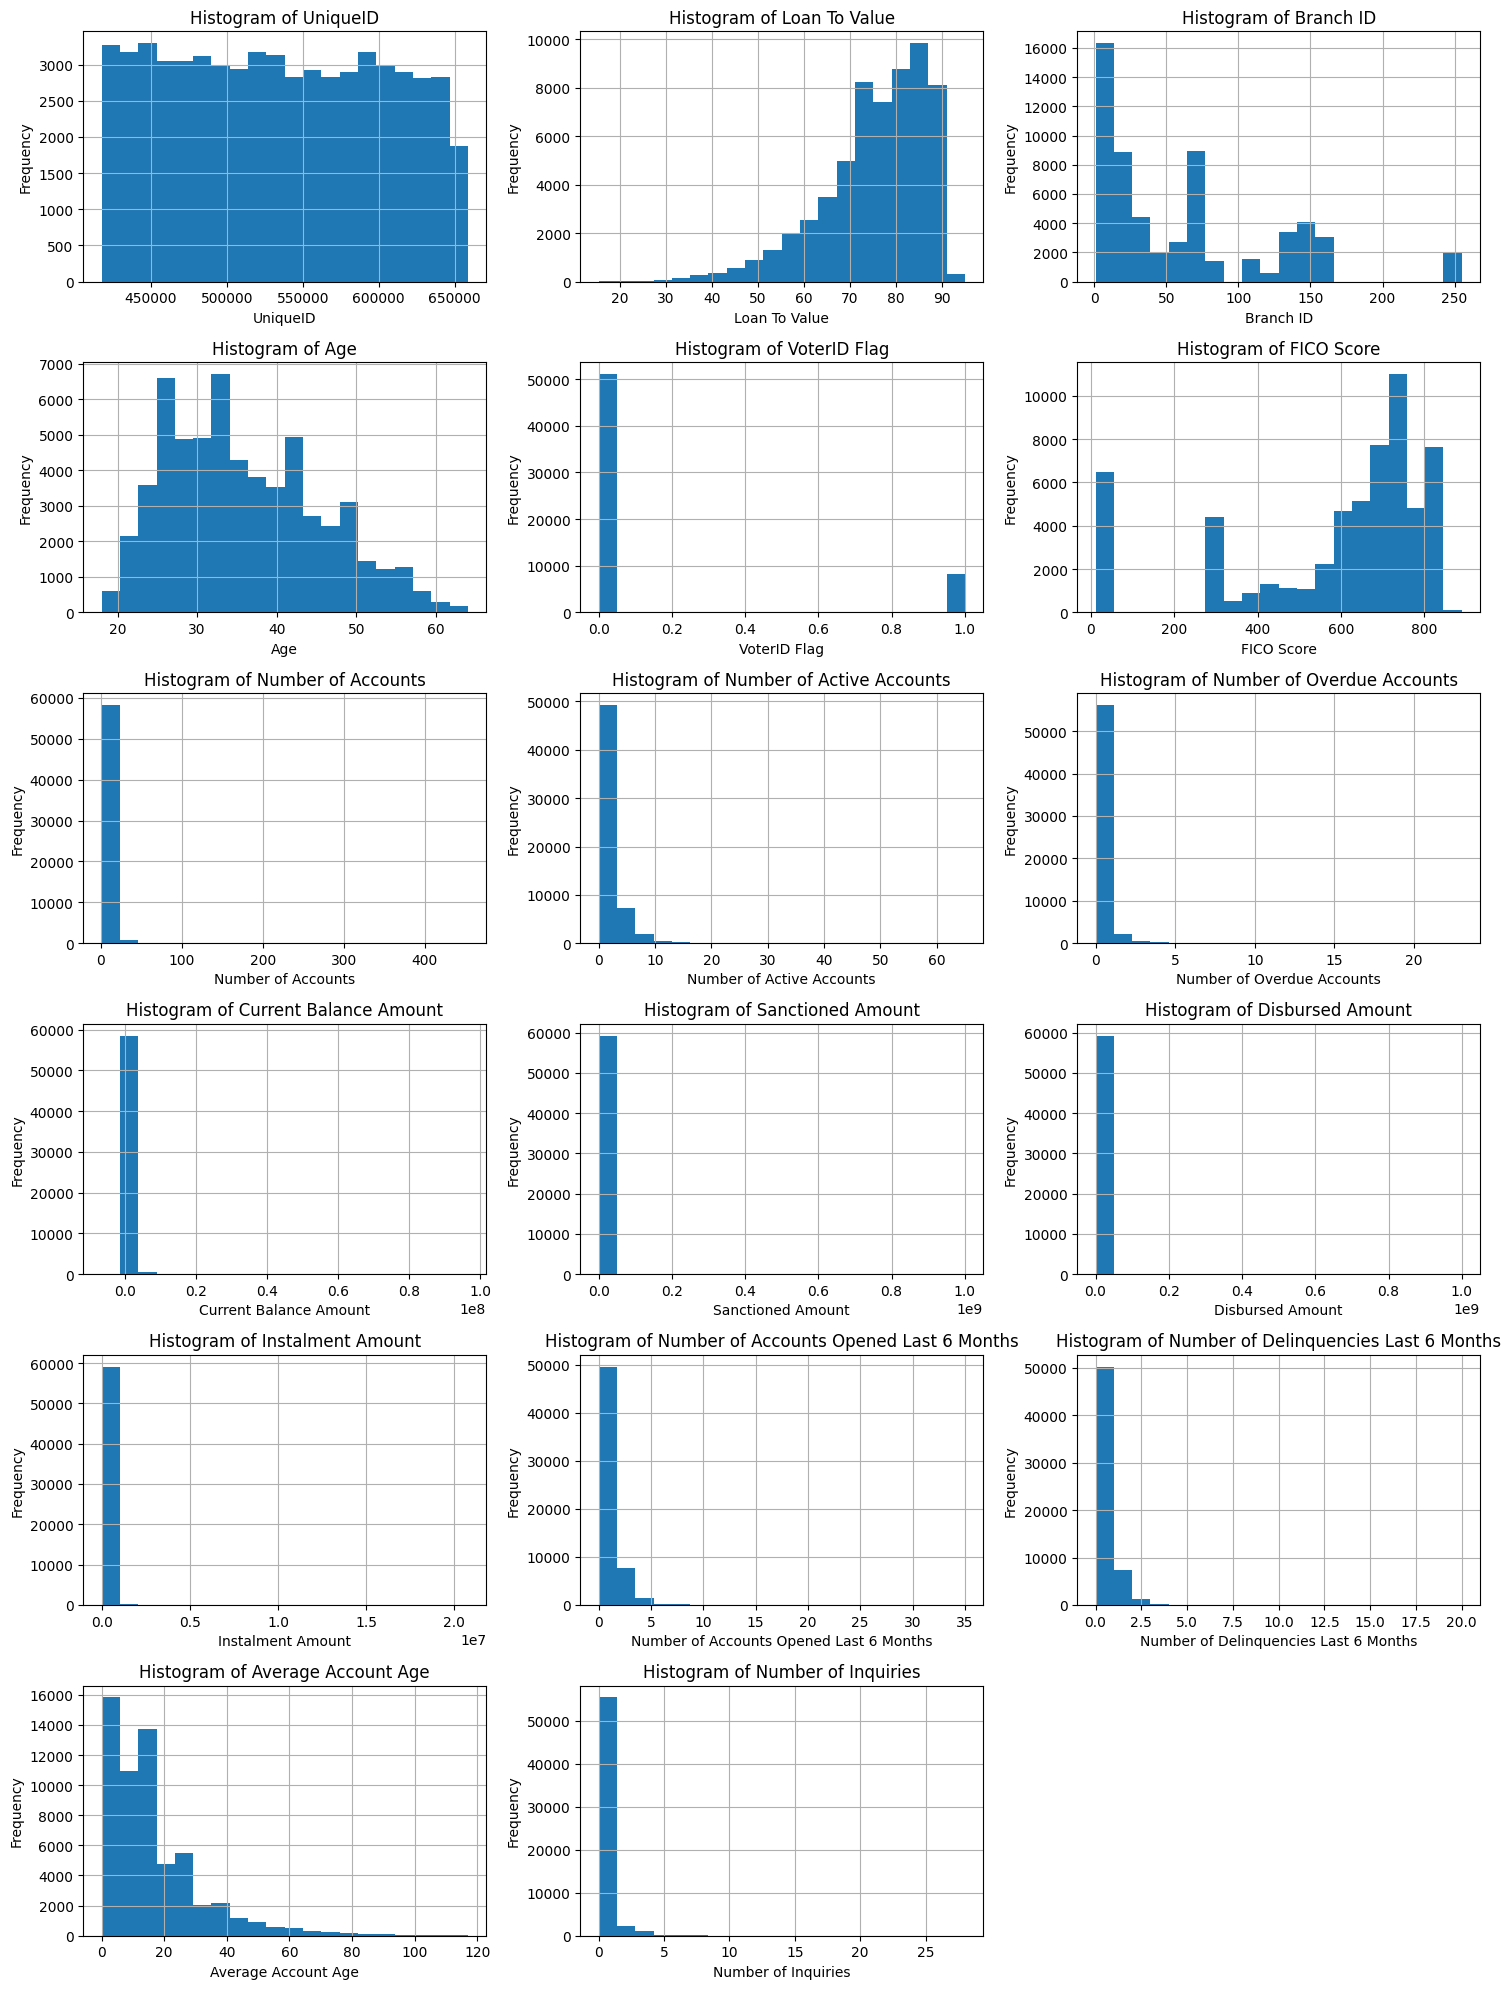

In [12]:
# General overview of the distribution of quantitative variables

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

num_plots = len(numerical_cols)
num_rows = int(num_plots / 3) + (num_plots % 3 > 0)
num_cols = min(num_plots, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
axes = axes.ravel()

for i, column in enumerate(numerical_cols):
    ax = axes[i]
    ax.hist(data[column], bins=20)  
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')
    ax.grid(True)

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


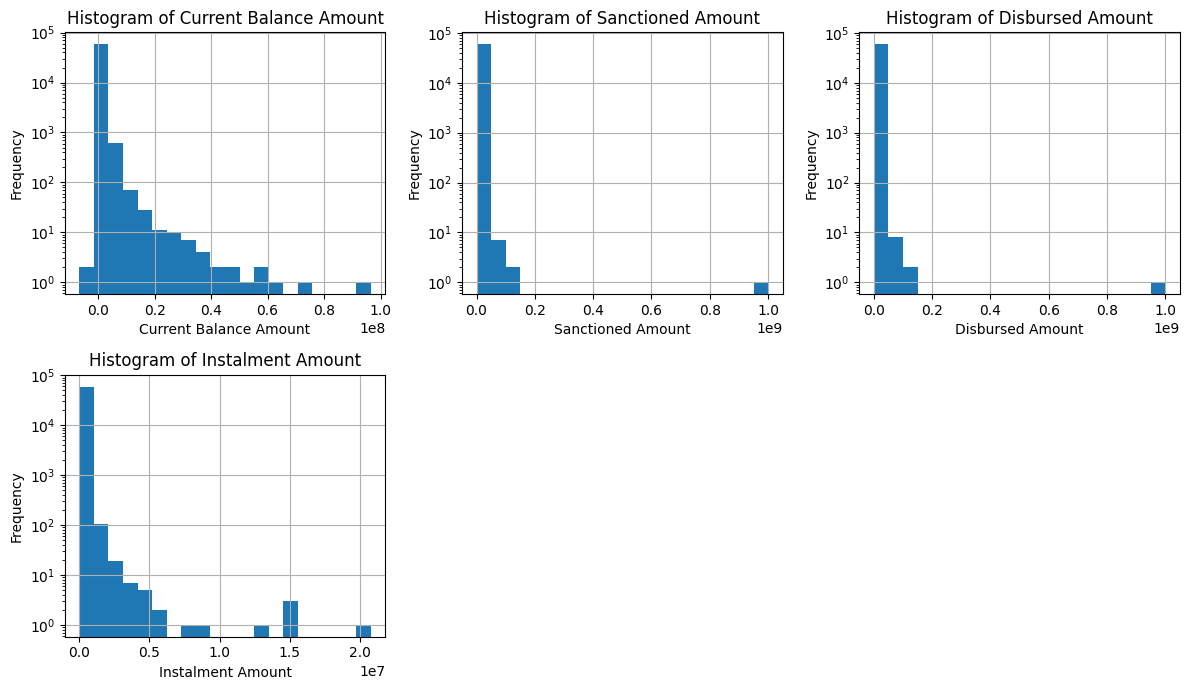

In [13]:
# check the y-log scale for some of the variables
# because of the data spanning orders of magnitude
# and trying to see possible patterns

log_cols = ['Current Balance Amount', 'Sanctioned Amount',
            'Disbursed Amount', 'Instalment Amount']

num_plots = len(log_cols)
num_rows = int(num_plots / 3) + (num_plots % 3 > 0)
num_cols = min(num_plots, 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 7))
axes = axes.ravel()

for i, column in enumerate(log_cols):
    ax = axes[i]
    ax.hist(data[column], bins=20)  
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_yscale('log')
    ax.set_title(f'Histogram of {column}')
    ax.grid(True)

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Objective

The objective of this analysis was to classify the customers according to their credit risk

Context: this is a dataset of a home-loan portfolio. There is no indication of the customers past repayment behaviour - unlabelled data.

(More context about some of the features)

**FICO score**: a US credit score (not the only, but the oldest and most used credit scoring model). Can be industry specific (and there are different generations of FICO), but there are also the general-purposes.
Income and employment history (or lack thereof) are not considered by the major credit bureaus when calculating credit scores. In the United States, the median generic FICO score was 723 in 2006 and 711 in 2011. The performance definition of the FICO risk score (its stated design objective) is to predict the likelihood that a consumer will go 90 days past due or worse in the subsequent 24 months after the score has been calculated. The higher the consumer's score, the less likely he or she will go 90 days past due in the subsequent 24 months after the score has been calculated. Because different lending uses (mortgage, automobile, credit card) have different parameters, FICO algorithms are adjusted according to the predictability of that use. For this reason, a person might have a higher credit score for a revolving credit card debt when compared to a mortgage credit score taken at the same point in time. (Source: Wikipedia)

The FICO model divides the usual range into 5 risk categories: poor, fair, good, very good and excelent. The "good" category does not necessarily indicate access to great rates. When it comes to the mortgage and home-loan, FICO is the socoring model most lenders use. FICO score carries information about: payment history, credit use, credit mix, age of accounts and others. Lenders look at this score to determine the risk of the customer as a borrower. In general, the higher your credit score, the more creditworthy you are and the more likely you are to pay back loans on time. On the flip side, a lower score could mean that you haven’t been consistent with paying back loans on time, or at all. In this case your risk as a borrower is higher. This increased risk as a borrower means your mortgage interest rates are most likely going to go up. (Source: Time Magazine)

**Loan To Value**: (in real state), this is the the ratio of the first mortgage line as a percentage of the total appraised value of real property. For instance, if someone borrows $130,000 to purchase a house worth $150,000, the LTV ratio is $130,000 to 150,000 or 87%. Loan to value is one of the key risk factors that lenders assess when qualifying borrowers for a mortgage. The risk of default is always at the forefront of lending decisions, and the likelihood of a lender absorbing a loss increases as the amount of equity decreases. Therefore, as the LTV ratio of a loan increases, the qualification guidelines for certain mortgage programs become much more strict. Low LTV (below 80%) may allow borrowers to consider higher-risk borrowers, such as those with low credit scores. However, an LTV higher than 80% may carry Mortgage Insurance requirements, which will in turn offer the borrower a lower interest rate. Higher LTV ratios are primarily reserved for borrowers with higher credit scores and a satisfactory mortgage history. (Source: Wikipedia)

**Sanctioned Amount**: The Sanctioned Amount is the maximum loan amount that a lender is willing to approve for a borrower based on their creditworthiness, financial profile, and the lender's lending criteria. It is the amount that the lender formally agrees to lend to the borrower. The Sanctioned Amount is determined after a thorough evaluation of the borrower's application, including their credit history, income, employment status, and the value of the property (in the case of a home loan). The lender assesses whether the borrower qualifies for the requested loan amount.

**Disbursed Amount**: The Disbursed Amount is the actual loan amount that the lender releases to the borrower. It represents the funds that are transferred from the lender to the borrower's account or, in the case of a home loan, directly to the seller or builder to facilitate the purchase of the property.
The Disbursed Amount may be equal to or less than the Sanctioned Amount, depending on the borrower's choice and the specific terms of the loan agreement.

**Instalment Amount**: The Instalment Amount, also known as the Equated Monthly Installment (EMI) in the case of home loans, represents the fixed amount that the borrower is required to pay to the lender at regular intervals (usually monthly) to repay the loan.
The Instalment Amount includes both the principal amount and the interest on the loan. It is calculated based on the loan amount, interest rate, and loan tenure.


Considering the importance of the FICO score for the mortgage and home-loan businesses, a possible way of assessing this problem is to **create a feature** that would **label** the customers based on their FICO score. To do this, the **classification of the FICO model** was used and adjusted, so I could end up with **2 or 3 categories** (both were tested): low risk, (medium risk), high risk. Also, the information that the current average FICO for the US citizen is of 715 was used for helping create the analysis for 2 classes. The rationale for this is as follows:

| Risk category | FICO score | Adjusted label for risk: 3 classes | Adjusted label for risk: 2 classes |
| ------------- | ---------- | ------------------------ | ------------------------------------------- | 
| Poor / very poor | 300 - 579 | High risk | High risk |
| Fair / poor | 580 - 669 | High risk | High risk |
| Good / fair | 670 - 739 | Medium risk | (Up to 715): High risk / (From 716): Low risk |
| Very good / good | 740 - 799 | Low risk | Low risk |
| Exceptional / excellent | 800 - 850 | Low risk | Low risk |

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59255 entries, 0 to 59338
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   UniqueID                                 59255 non-null  int64  
 1   Loan To Value                            59255 non-null  float64
 2   Branch ID                                59255 non-null  int64  
 3   Age                                      59255 non-null  int64  
 4   Employment Type                          59255 non-null  object 
 5   DisbursalDate                            59255 non-null  object 
 6   State                                    59255 non-null  object 
 7   VoterID Flag                             59255 non-null  int64  
 8   FICO Score                               59255 non-null  int64  
 9   Number of Accounts                       59255 non-null  int64  
 10  Number of Active Accounts                59255 non-

In [15]:
# Create the labels
def create_risk_col(df, nclasses):

    """Create categorical column indicating risk
    based on FICO score"""
    
    if nclasses == 2:
            
        conditions = [
            (df['FICO Score'] <= 715),
            (df['FICO Score'] >= 716)
        ]
        values = ['High', 'Low']
        df['Risk_2'] = np.select(conditions, values, default='Unknown')
    
    else:
        conditions = [
            (df['FICO Score'] <= 669),
            (df['FICO Score'] >= 670) & (df['FICO Score'] <= 739),
            (df['FICO Score'] >= 740)
        ]
        values = ['High', 'Medium', 'Low']
        df['Risk_3'] = np.select(conditions, values, default='Unknown')
    
    
    return(df)

In [16]:
data = create_risk_col(data, 2)
data = create_risk_col(data, 3)

In [17]:
# data.head()
print(pd.unique(data['Risk_2'])) # check levels
print(pd.unique(data['Risk_3']))

['High' 'Low']
['High' 'Low' 'Medium']


## Exploratory analysis

### Risk label

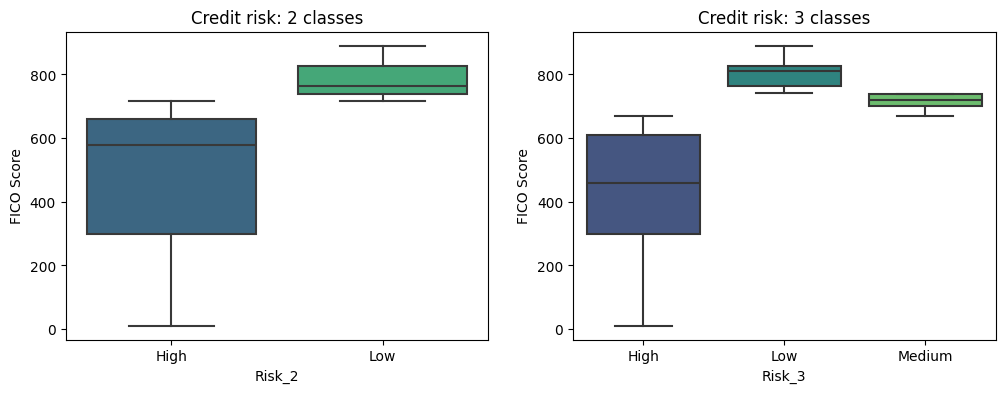

In [18]:
# Check distribution of the customers labelled
# Showing the 2 types of classes, for exploratory purposes

fig, axes = plt.subplots(1,2, figsize = (12,4))
sns.boxplot(ax=axes[0], data=data, x='Risk_2', y='FICO Score', palette='viridis')
axes[0].set_title('Credit risk: 2 classes')
sns.boxplot(ax=axes[1], data=data, x='Risk_3', y='FICO Score', palette='viridis')
axes[1].set_title('Credit risk: 3 classes')
plt.show()

As in many classification problems, the medium class get too close to one (or both) of them, which may cause confusion and be bad for predictions. The classe with lower FICO (high risk) has more intense variability - as it is also expected - since the span of scores is much larger. 

### Correlation

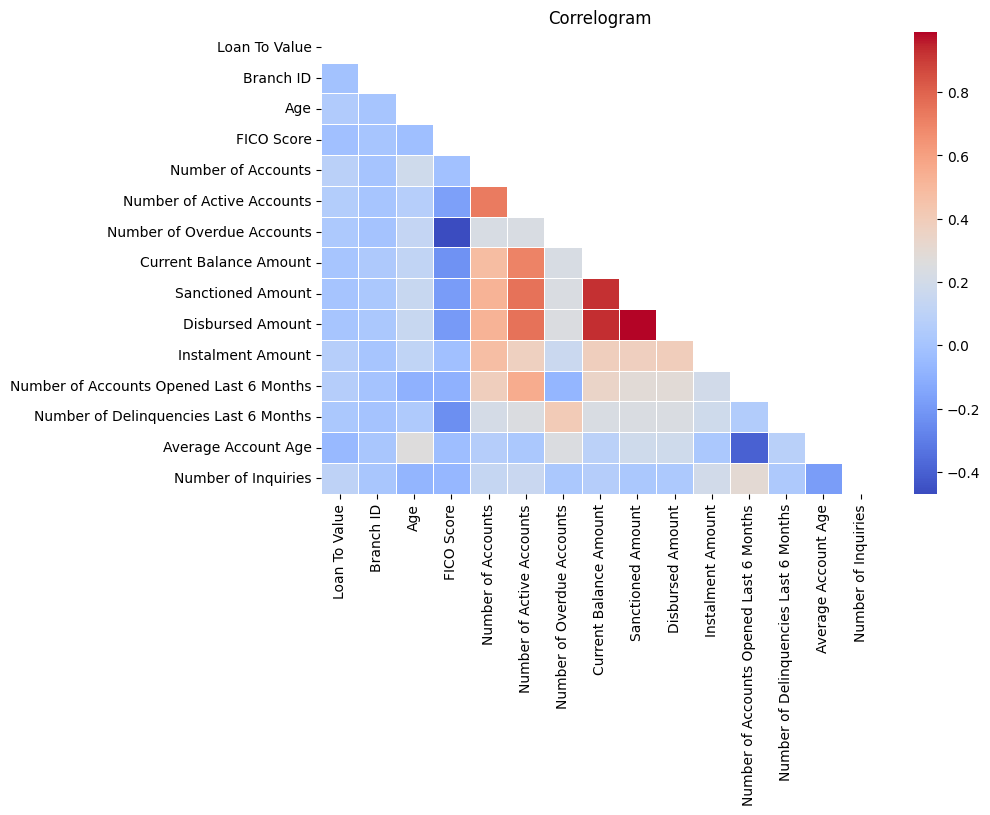

In [19]:
# Correlogram of numerical relevant variables

df_to_correlation = data.select_dtypes(include=['float64', 'int64'])
df_to_correlation = df_to_correlation.drop(['UniqueID', 'VoterID Flag'], axis=1)
df_corr = df_to_correlation.corr(method='spearman')

mask = np.triu(np.ones_like(df_corr, dtype=bool))
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask, ax=ax)
plt.title('Correlogram')
plt.show()

We can see that FICO Score is not positevely and strongly correlated with none of the variables, where the strongest correlation (and negative) correlation is found with Number of Overdue Accounts.

Lon to Value also is weakly (and negatively )correlated with all other variables.

Strong and positive correlations can be found between Number of Active Accounts and Amounts of loan and current balance amount.

### Bi-variate analysis

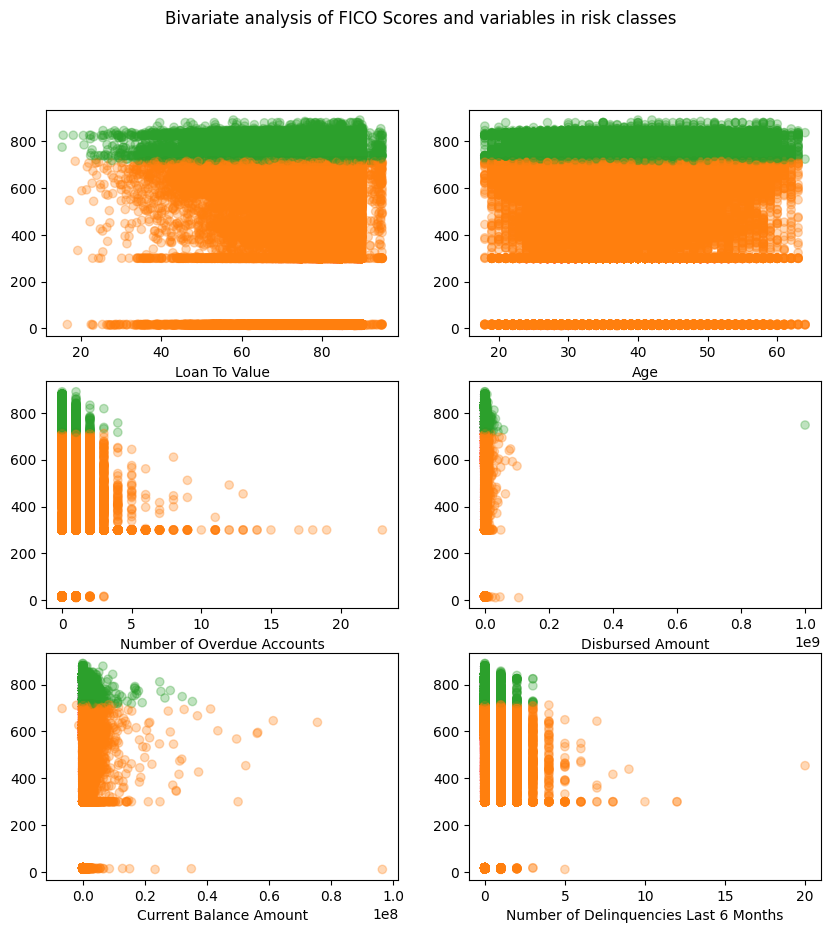

In [20]:
fig, ax = plt.subplots(3,2, figsize = (10,10))
colors = {'High': 'tab:orange', 'Medium': 'tab:blue', 'Low': 'tab:green'}
ax[0,0].scatter(y=data['FICO Score'], x=data['Loan To Value'], c=data['Risk_2'].map(colors), alpha = 0.3)
ax[0,0].set_xlabel('Loan To Value')
ax[0,1].scatter(y=data['FICO Score'], x=data['Age'], c=data['Risk_2'].map(colors), alpha = 0.3)
ax[0,1].set_xlabel('Age')
ax[1,0].scatter(y=data['FICO Score'], x=data['Number of Overdue Accounts'], c=data['Risk_2'].map(colors), alpha = 0.3)
ax[1,0].set_xlabel('Number of Overdue Accounts')
ax[1,1].scatter(y=data['FICO Score'], x=data['Disbursed Amount'], c=data['Risk_2'].map(colors), alpha = 0.3)
ax[1,1].set_xlabel('Disbursed Amount')
ax[2,0].scatter(y=data['FICO Score'], x=data['Current Balance Amount'], c=data['Risk_2'].map(colors), alpha = 0.3)
ax[2,0].set_xlabel('Current Balance Amount')
ax[2,1].scatter(y=data['FICO Score'], x=data['Number of Delinquencies Last 6 Months'], c=data['Risk_2'].map(colors), alpha = 0.3)
ax[2,1].set_xlabel('Number of Delinquencies Last 6 Months')
fig.suptitle('Bivariate analysis of FICO Scores and variables in risk classes')
plt.show()

It is possible to see that, for all of the variables in the plots above, there is a majority of people of higher credit risk, with some fairly homogeneous distribution along the x-axis, at least for age and Loan to Value. In practice, this means for example for age, that for all age spans there are people of low and high credit risk.
For the other 4 variables, we have a little bit more patter to see, for example, people with lower risk have their number of delinquencies much more restricted (less than 5) than people with higher credit risk. The same idea goes to current balance amount, disbursed amount and number of overdue accounts. The classe with higher credit risk, not only present more people, but also more variability, indicating it represents a large variety of profiles.
These specific variables were chose for this bivariate analysis because they more correlated with FICO Score than the others.

However, visualization is not that good, now it is clear that there are some very low FICO scores.
Doing a brif research, it was stated that for US, the range for credit score is 300 - 850, which makes more unlikely that those values represent reality. They could be used for a further analysis on those customers and why they are with such low scores, but for now, the focus is to have data that may result in a good model. And such low (and maybe unreal) may be a problem, even if the category was created by just assiginig High risk for values below national average (maybe other information are also unreliable).
There is also very high values in Disbursed Amount, greater than 100000000, which is incredibly high. WIthouth further investigation if that is a realistic information, it will also be dropped from the modeling stage.

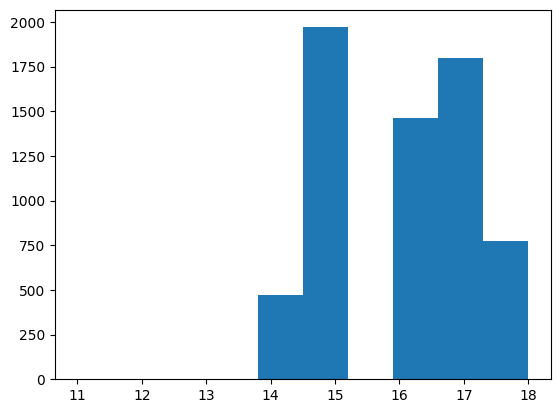

In [21]:
a = data.query('`FICO Score` < 50') # there are observations w/ FICO between 14 and 20, which does not seem realistic
# doing a brief research, it was stated that values for crediting industry goes from 300 - 850
plt.hist(a['FICO Score'])
plt.show()

In [22]:
# Last cleaning before modeling
# with the plots above, it was possible to identify some observations
# that are probably outliers and may impact the predictions
data = data.query('`FICO Score` > 50')
data = data.query('`Disbursed Amount` < 100000000')

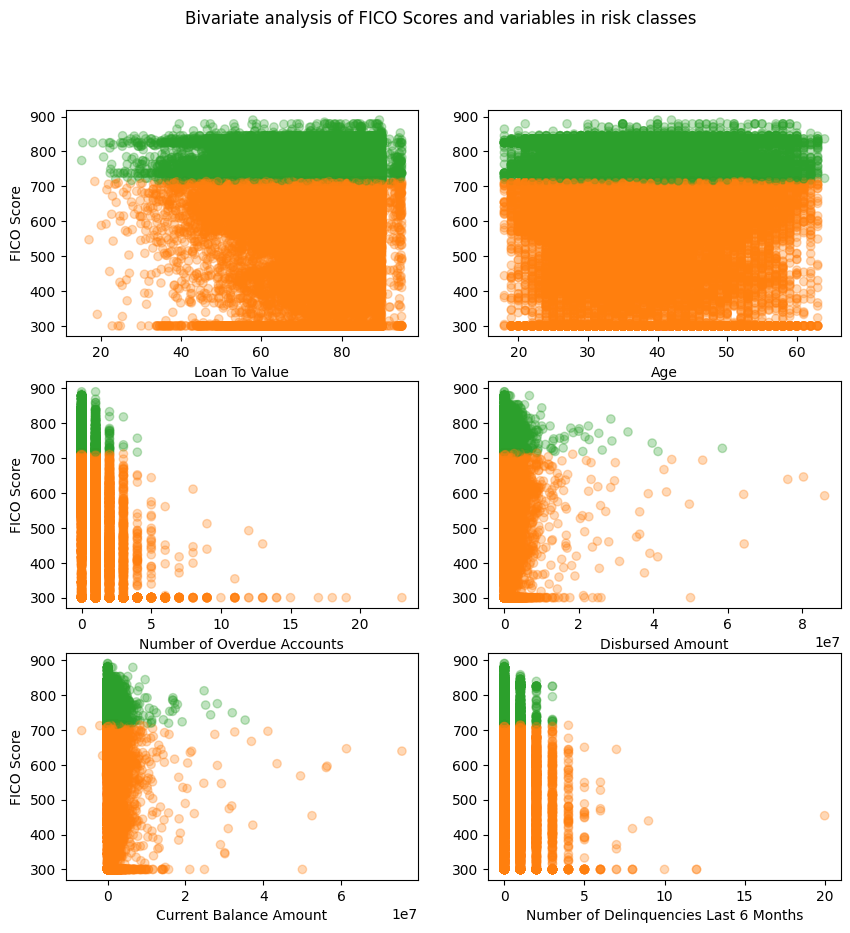

In [23]:
# Repeating the bivariate visualizations

fig, ax = plt.subplots(3,2, figsize = (10,10))
colors = {'High': 'tab:orange', 'Medium': 'tab:blue', 'Low': 'tab:green'}
ax[0,0].scatter(y=data['FICO Score'], x=data['Loan To Value'], c=data['Risk_2'].map(colors), alpha = 0.3)
ax[0,0].set_xlabel('Loan To Value')
ax[0,0].set_ylabel('FICO Score')
ax[0,1].scatter(y=data['FICO Score'], x=data['Age'], c=data['Risk_2'].map(colors), alpha = 0.3)
ax[0,1].set_xlabel('Age')
ax[1,0].scatter(y=data['FICO Score'], x=data['Number of Overdue Accounts'], c=data['Risk_2'].map(colors), alpha = 0.3)
ax[1,0].set_xlabel('Number of Overdue Accounts')
ax[1,0].set_ylabel('FICO Score')
ax[1,1].scatter(y=data['FICO Score'], x=data['Disbursed Amount'], c=data['Risk_2'].map(colors), alpha = 0.3)
ax[1,1].set_xlabel('Disbursed Amount')
ax[2,0].scatter(y=data['FICO Score'], x=data['Current Balance Amount'], c=data['Risk_2'].map(colors), alpha = 0.3)
ax[2,0].set_xlabel('Current Balance Amount')
ax[2,0].set_ylabel('FICO Score')
ax[2,1].scatter(y=data['FICO Score'], x=data['Number of Delinquencies Last 6 Months'], c=data['Risk_2'].map(colors), alpha = 0.3)
ax[2,1].set_xlabel('Number of Delinquencies Last 6 Months')
fig.suptitle('Bivariate analysis of FICO Scores and variables in risk classes')
plt.show()

## Modeling

In the credit scoring modeling, it is common to use a history database of clients, and this assumes that behaviour does not change during time. Most of the studies in this area have labelled data, sometimes using also an unsupervised technique. The most frequent used models are: logistic regression, decision trees, linear regression, discriminant analysis, neural networks and others.
Classification is easier when it is binary, but depending on the context, the use of more classes may be needed.

In terms of binary classification, logistic regression is probably the most used, and unlike discriminant analysis it does not rely on normality assumptions.
Decision trees are also an interesting model, and they allow for some interpretation unlike other machine learning approaches, although the use of large amount of variables may be a problem for interpretation.

In [24]:
# from sklearn.manifold import LocallyLinearEmbedding
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_recall_curve
from scipy.stats import ks_2samp


In [25]:
data.columns

Index(['UniqueID', 'Loan To Value', 'Branch ID', 'Age', 'Employment Type',
       'DisbursalDate', 'State', 'VoterID Flag', 'FICO Score',
       'Number of Accounts', 'Number of Active Accounts',
       'Number of Overdue Accounts', 'Current Balance Amount',
       'Sanctioned Amount', 'Disbursed Amount', 'Instalment Amount',
       'Number of Accounts Opened Last 6 Months',
       'Number of Delinquencies Last 6 Months', 'Average Account Age',
       'Number of Inquiries', 'Risk_2', 'Risk_3'],
      dtype='object')

In [26]:
# Prepare to modeling

# dropping columns of no use
# and the FICO, since it was used to create the labels
data_to_model = data.drop(columns=['UniqueID', 'DisbursalDate', 'VoterID Flag', 'FICO Score', 'Risk_3'])

X = data_to_model.drop(columns=['Risk_2'])  
y = data_to_model['Risk_2']
y = y.replace({'Low': 0, 'High': 1})

object_cols = X.select_dtypes(include=['object']).columns
int_cols = X.select_dtypes(include=['int']).columns
float_cols = X.select_dtypes(include=['float']).columns

# Preprocess
label_encoder = LabelEncoder()
for col in object_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Standardize int and float cols
scaler = StandardScaler()
X[int_cols] = scaler.fit_transform(X[int_cols])
X[float_cols] = scaler.fit_transform(X[float_cols])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 

In [27]:
# Hyperparameter tuning for Logistic Regression
param_grid_logistic = {
    'solver': ['lbfgs', 'saga', 'liblinear'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

logistic_reg = LogisticRegression(random_state=42)
grid_search_logistic = GridSearchCV(estimator=logistic_reg, param_grid=param_grid_logistic, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_logistic.fit(X_train, y_train)
# get the best log regr model
best_logistic_model = grid_search_logistic.best_estimator_

/Users/mariacsandrea/Documents/Personal/pvn/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mariacsandrea/Documents/Personal/pvn/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mariacsandrea/Documents/Personal/pvn/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mariacsandrea/Documents/Personal/pvn/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mariacsandrea/Documents/Personal/pvn/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs 

In [28]:
print(best_logistic_model)

LogisticRegression(C=100, random_state=42, solver='liblinear')


In [29]:
# Hyperparameter tuning for Decision Tree 
param_grid_tree = {
    'max_depth': [None, 2, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

decision_tree = DecisionTreeClassifier(random_state=42)
grid_search_tree = GridSearchCV(estimator=decision_tree, param_grid=param_grid_tree, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)
# get the best tree model
best_tree_model = grid_search_tree.best_estimator_


In [30]:
print(best_tree_model)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=20,
                       random_state=42)


[Text(0.5, 0.9, 'Number of Overdue Accounts <= 0.217\nentropy = 0.992\nsamples = 42217\nvalue = [18935, 23282]\nclass = High Risk'),
 Text(0.25, 0.7, 'Current Balance Amount <= -0.249\nentropy = 0.981\nsamples = 32119\nvalue = [18653, 13466]\nclass = Low Risk'),
 Text(0.125, 0.5, 'Number of Delinquencies Last 6 Months <= 0.533\nentropy = 0.79\nsamples = 13871\nvalue = [10580, 3291]\nclass = Low Risk'),
 Text(0.0625, 0.3, 'Average Account Age <= 0.594\nentropy = 0.753\nsamples = 13096\nvalue = [10267, 2829]\nclass = Low Risk'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Disbursed Amount <= -0.277\nentropy = 0.973\nsamples = 775\nvalue = [313, 462]\nclass = High Risk'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Number of Delinquencies Last 6 Months <= 0.533\nentropy = 0.99\nsamples = 18248\nvalue = [8073, 10175]\nclass = High Risk'),
 Text(0.3125, 0.3, 'Number of Accounts Opened Last

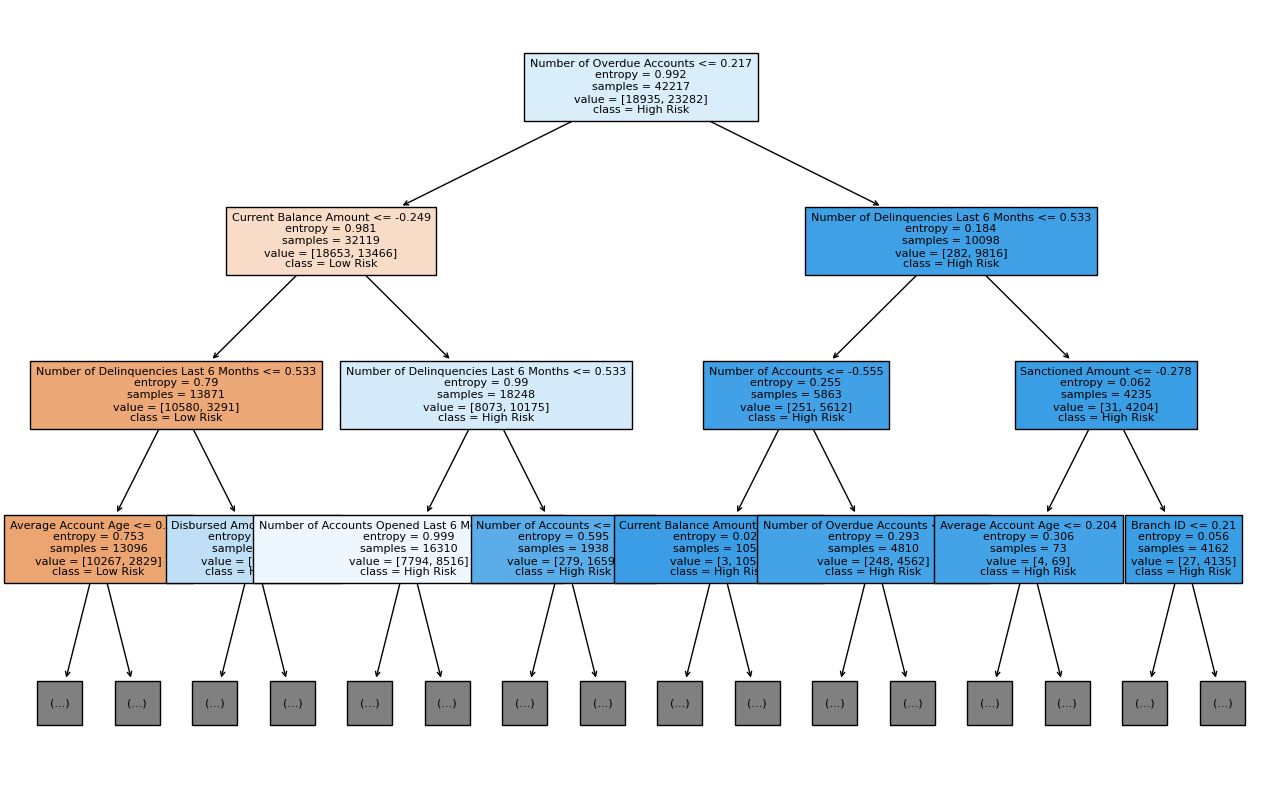

In [31]:
# Plotting a part of the decision tree to help interpretation
# obs: a large nuber of variables makes difficult to plot and interpret the decision tree
# in this case, I'm plotting just a part of it, controlled by the max_depth parameter

plt.figure(figsize=(16,10))
tree.plot_tree(best_tree_model, max_depth=3, fontsize=8,
               feature_names=X.columns, class_names=['Low Risk', 'High Risk'], filled=True)

The plot above is just a small part of the decision tree, controlled by the depth of the tree in the plot.

Decision trees are interesting due to their possibility of interpretation, as also gives space for working directly with the client and easily getting their feedback instead of having a complex black box model that makes understanding much more difficult.

In [32]:
# Make probability predictions using the best models
y_pred_logistic = best_logistic_model.predict_proba(X_test)[:, 1]
y_pred_tree = best_tree_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for both models
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Compute the Kolmogorov-Smirnov stats for both models
ks_stat_logistic, _ = ks_2samp(y_pred_logistic[y_test == 1], y_pred_logistic[y_test == 0])
ks_stat_tree, _ = ks_2samp(y_pred_tree[y_test == 1], y_pred_tree[y_test == 0])

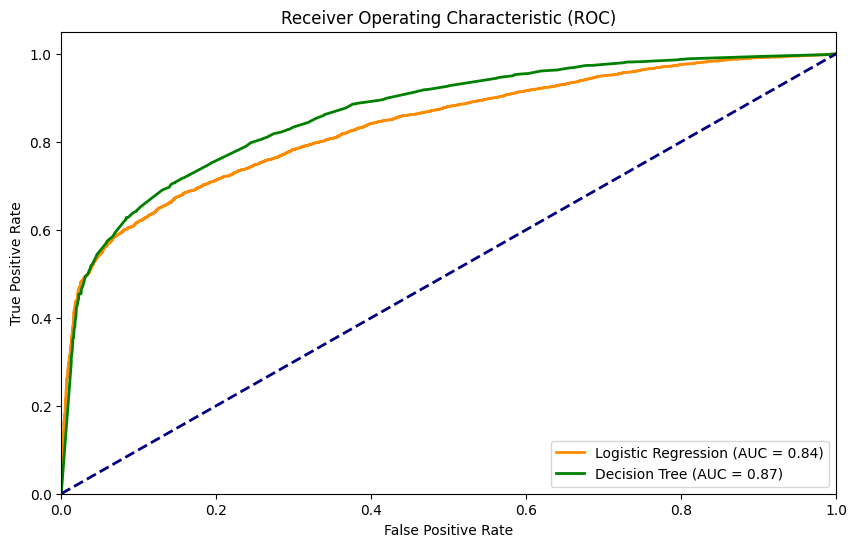

In [33]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()



The ROC curve is an interesting way to help assess model(s) performance specially when making comparisons, since it summarizes the trade-off between sensitivity (True Positive Rate, TPR) and specificity (False Positive Rate, FPR) throug model performance across different probability thresholds. 

The blue dashed line show a teoretical model with no prediciton value (similar to random predicitions), and the best possible model is the one that is closest to the upper left corner of the chart. 

The "path" of the curve represent the different thresholds for classification; if we lower the threshold, we would have more classifications as positive, and consequently increase both FPR and TPR. In this context, we have the AUC (Area Under the Curve), which gives us an aggregate measure of performance across these possible different thresholds, and values close to 1.0 indicating the best performance models. 

However, AUC is also insensitive to the differences we have in practice (real world conditions) due to the different types of classifications errrors. For example, it may be the case that we are more concerned with false positive rates than with false negative rates - thus, it would be more critical pointing high risk when there isn't (and maybe loosing a customer) than when the model does not point high risk when there is (and maybe loosing payments). All these specificities should be vaery clear in the business understanding, so that the model could be properly assessed.

The above plot indicates that across threshould Decision Tree was overall better, as also the AUC indicates a better performance of this model.

In [34]:
# Print other metrics
y_pred_logistic_binary = (y_pred_logistic > 0.5).astype(int)
y_pred_tree_binary = (y_pred_tree > 0.5).astype(int)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic_binary))
print("ROC AUC:", roc_auc_score(y_test, y_pred_logistic))
print("KS Statistic:", ks_stat_logistic)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic_binary))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic_binary))



Logistic Regression:
Accuracy: 0.7510184746565609
ROC AUC: 0.8360113067885253
KS Statistic: 0.5258891413280798
Confusion Matrix:
 [[3965  676]
 [1952 3962]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.85      0.75      4641
           1       0.85      0.67      0.75      5914

    accuracy                           0.75     10555
   macro avg       0.76      0.76      0.75     10555
weighted avg       0.77      0.75      0.75     10555



In [35]:
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree_binary))
print("ROC AUC:", roc_auc_score(y_test, y_pred_tree))
print("KS Statistic:", ks_stat_tree)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree_binary))
print("Classification Report:\n", classification_report(y_test, y_pred_tree_binary))


Decision Tree:
Accuracy: 0.7772619611558503
ROC AUC: 0.8654965224819409
KS Statistic: 0.5615430740855953
Confusion Matrix:
 [[3431 1210]
 [1141 4773]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.74      4641
           1       0.80      0.81      0.80      5914

    accuracy                           0.78     10555
   macro avg       0.77      0.77      0.77     10555
weighted avg       0.78      0.78      0.78     10555



+ The classification report indicates that for both models, class 1 has higher **precision** than classe 0. Precision indicates how many customers were correctly classified in that class; thus it was easier for both models to identify the customers who were assigned high credit-risk. In this case: Logistic regression predicted that: for all the customers that were labeled as high risk, 85% actually were (better than Decision Tree for that class).
Obs: Precision = TP / (TP + FP)

+ **Recall** indicates the proportion of customers were correctly classified among all (true positives and false negatives), which can be understood as the ability of the model to find the relevant instances of the class in the entire dataset. WHile logistic regression was better at class 0, Decision Tree was better at class 1. In this case: out of all the customers who were actually of high risk, the model predicted this outcome correctly in 81% of the cases (Decision Tree) and 67% of the cases (Logistic regression). (Although Log Regression had good performance with customers of low risk, with 85%).
(Remebering that Recall and Precision do have a relationship: if we increase precision, we decrease recall and vice-versa). 
Obs: Recall = TP / (TP + FN)

+ Usually, we look for balance, i.e., have the highest possible precision and **recall** does that (that probably goes for most situations, but context should be taken into account). In this case, we can also interpret the F1-Score: a harmonic mean (avoiding extreme values) of precision and recall. In this case: The models are satisfactory in predicting the high risk of credit, with Decision Tree outperforming the predicitons whether or not customers are of high risk.
Obs: F1 = 2 * ((precision * recall) / (precision + recall))

+ The **Kolmogorov-Smirnov** test (non-parametric) is a commonly used measure of separation (determine if samples were withdrawn from the same population). In the case of (relatively) large population, distributions are more likely to be considered different. And concerning the comparison between models, the best model is the one with a higher value of this statistic, because it indicates a better separation between the classes, in this case, customers of high and low risk. In this case, we have a better performance of the Decision Tree model.

## Conclusions

In this analysis, the choice for one or another model should take into account possible specificities of context regarding whether it is better to focus on better predicitons of classe of high or low risk and their associated type errors. This would guide the preferences for one or another metric, for example.

Considering a **general balance** and better predicition for class of **high risk**, the choice would be for a **Decision Trees**. Although a more detailed work was not performed with variables for Logistic regression (e.g., stepwise), Decision Trees deal well with multicolinearity and presented a fairly satisfactory performance as **starting point for further studies**.

### Other relevant observations about the proposed methodology

The first attempted approaches in this analysis were clustering and PCA analysis.

Clustering attempts were made for the socio-demographic variables, another for variables more related to customers financial profile, and also a general cluster, with lots of information together. The performance of all clusters was not satisfactory - visually, it was possible to see that groups were not well separated (tries for 2,3,4,5, groups), and quantitatively, confirmed by very low silhouette scores (between 0.15 - 0.18).

PCA analysis was also run for differents sets of variables, but slightly different since they were all quantitative. The idea in this case would be to work with 2, 3 max PCs, assuming they would represent at least 60% of variance and performe some modeling. But also, performance of all attempts was not satisfactory - 3 main PCs not reachin 40% of variance.

With a brief research in recent literature, whether less technical or more scientific, it was possible to see that most approaches to this kind of problem, no matter the industry, are using labels and supervised approaches - sometimes an unsupervised followed by a supervised one. So the idea was to use the most related variable to the credit-risk and "transform" it into the labels. Advantages may be that this variable probably represents really well a general view of the risk from each customer, disadvantages are that it couldn't be use as independent variable for predictions - in other situations, with real lables and using FICO, model performance would probably be much better.